In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset_material = pd.read_excel('Data_Ghiringhelli.xlsx', 'Material Data')
dataset_atomic = pd.read_excel('Data_Ghiringhelli.xlsx',   'Atomic Data')
dataset_atomic.columns = ['Z', 'A', 'IP', 'EA', 'HOMO', 'LUMO', 'rs', 'rp', 'rd', '1D']

In [6]:
def get_row(element,dataframe):
    return (dataframe.loc[dataframe['A']==element])

def collecting_descriptor(a,b, dataframe=dataset_atomic):
    row_a = get_row(element=a, dataframe=dataframe)
    row_b = get_row(element=b, dataframe=dataframe)
    return row_a,row_b

In [10]:
#luca 3d
def formula(a,b):
    return [(b['EA'].values-b['IP'].values)/(a['rp'].values**2),
           (np.abs(a['rs'].values-b['rp'].values))/a['rs'].values**2 ,
           (np.abs(b['rp'].values-b['rs'].values))/a['rd'].values**2]

In [26]:
#our 1D
def formula(a,b):
    return 

In [40]:
#our 2D 
def formula(a,b):
    return 

In [45]:
#our 3D:
def formula(a,b):
    return 

In [13]:
def calculating_features(formula,dataframe):
    feature_array = []
    for kk in range(len(dataframe.values)):
        el_a,el_b   = (dataframe.values)[kk][2:4]
        row_a,row_b = collecting_descriptor(a=el_a, b=el_b)
        res = formula(row_a, row_b)
        feature_array.append(res)
    return feature_array

In [46]:
our_3d = calculating_features(dataframe=dataset_material, formula=formula)

In [52]:
luca1D = np.array(luca_3d)[0:,0].reshape(82,)
luca2D = np.array(luca_3d)[0:,1].reshape(82,)
luca3D = np.array(luca_3d)[0:,2].reshape(82,)
#---------------------------------------------
our_1d = np.array(our_1d).reshape(82,)
our_2d_1 = np.array(our_2d).reshape(82,2)[0:,0]
our_2d_2 = np.array(our_2d).reshape(82,2)[0:,1]
#---------------------------------------------
our_3d_1 = np.array(our_3d).reshape(82,3)[:,0]
our_3d_2 = np.array(our_3d).reshape(82,3)[:,1]
our_3d_3 = np.array(our_3d).reshape(82,3)[:,2]

In [53]:
all_features = [luca1D,luca2D,luca3D, our_1d, our_2d_1, our_2d_2, our_3d_1, our_3d_2, our_3d_3]

In [69]:
from itertools import permutations 
perm = permutations(range(len(all_features)), 2) 

In [70]:
from scipy import stats
mat_pearson = np.zeros((9,9))
mat_pvalues = np.zeros((9,9))
for ii in perm:
    per,pval = stats.pearsonr(all_features[ii[0]], all_features[ii[1]])  
    mat_pearson[ii[0],ii[1]] = abs(round(per,3))
    mat_pvalues[ii[0],ii[1]] = abs(round(pval,3))

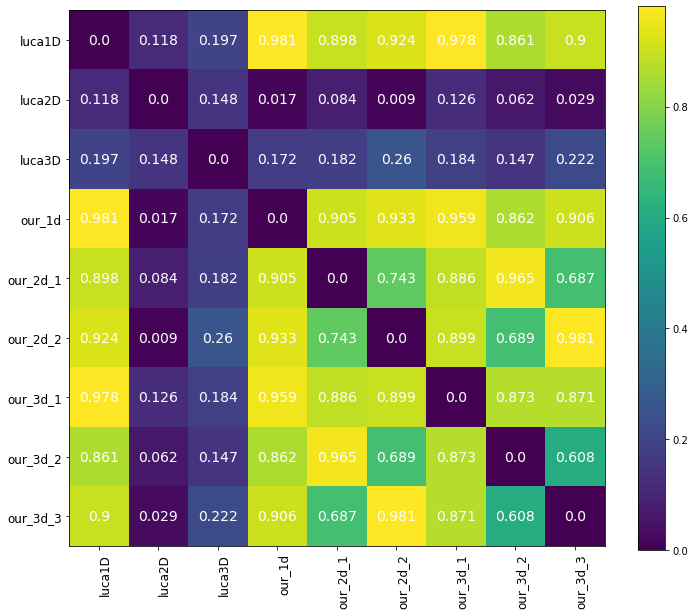

In [88]:
columns = ['luca1D','luca2D','luca3D', 'our_1d', 'our_2d_1', 'our_2d_2', 'our_3d_1', 'our_3d_2', 'our_3d_3']
matrix = mat_pearson
fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(matrix)
ax.set_xticks(range(9))
ax.set_yticks(range(9))
ax.set_xticklabels(list(columns),fontsize=12);
ax.set_yticklabels(list(columns),fontsize=12);
fig.colorbar(im);
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor");

for i in range(9):
    for j in range(9):
        text = ax.text(j, i, matrix[i, j],
                       ha="center", va="center", color="w",fontsize=14)
plt.savefig('pearson_correlation_comparing_different_parameters.png')
